<a href="https://colab.research.google.com/github/mraihanlos/pemrograman-python/blob/main/Tugas_13_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#PATH LOSS COST231 FUNCTION
def cos(frek,tipe,ht,hr,d):
  #frek = frekuensi (MHz)
  #tipe = urban, suburban, open
  #ht = tinggi tower (meter)
  #hr = tinggi user (meter)
  #d = jarak (meter)
    if frek in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif frek in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if tipe=='urban' :
        Cm=0
    elif tipe=='suburban' :
        Cm= -2*((np.log10((frek/28)**2))-5.4)
    elif tipe=='open' :
        Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
    else :
        Cm='tipe salah'
    
    ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
    Lp = Ca+(Cb*np.log10(frek))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
f1=1800 #MHz
f2=900
f3=700
loc1='urban'
loc2='suburban'
loc3='open'
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik
d=np.random.randint(dmin,dmax,N)

In [ ]:
print(d)

[435 587 641 328 313 346 692 426 549 692 255 325 460 682 697 359 281 661
 239 681 530 526 244 516 393 555 585 350 430 445 521 577 287 393 675 226
 698 355 598 561 386 500 620 632 422 514 605 423 305 299 696 364 602 330
 373 626 469 502 379 398 451 203 603 410 442 406 660 341 633 247 696 515
 580 364 389 283 620 374 395 667 214 693 375 546 460 227 474 301 503 331
 255 471 219 654 561 438 335 424 497 601 501 268 267 628 616 406 433 308
 252 668 660 657 309 441 602 287 663 518 586 352 234 488 681 673 208 312
 557 541 399 690 531 388 207 464 247 608 536 477 557 331 644 596 620 614
 266 213 531 472 437 361 610 223 457 288 540 467 444 620 606 288 293 254
 256 599 285 480 651 369 490 369 441 531 596 687 448 572 466 623 590 328
 335 404 506 381 258 575 435 292 364 529 617 271 427 239 319 498 498 651
 306 356]


In [ ]:
#COST 231 DEF
LpUrban1 = cos(f1,loc1,tower,user,d)
LpUrban2 = cos(f2,loc1,tower,user,d)
LpUrban3 = cos(f3,loc1,tower,user,d)
LpSubUrban = cos(f1,loc2,tower,user,d)
LpOpen = cos(f1,loc3,tower,user,d)

In [ ]:
#Sorting Array
d_sort=d[np.argsort(d)]
Urban1_sort=LpUrban1[np.argsort(d)]
Urban2_sort=LpUrban2[np.argsort(d)]
Urban3_sort=LpUrban3[np.argsort(d)]
SubUrban_sort=LpSubUrban[np.argsort(d)]
Open_sort=LpOpen[np.argsort(d)]

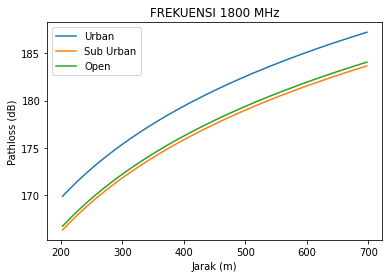

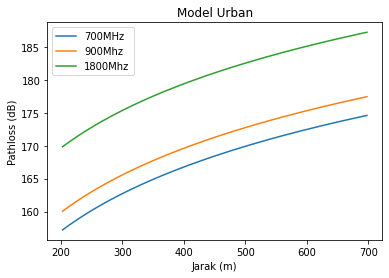

In [ ]:
#Summarize Graph for F = 1800MHz
plt.plot(d_sort,Urban1_sort)
plt.plot(d_sort,SubUrban_sort)
plt.plot(d_sort,Open_sort)
plt.title('FREKUENSI 1800 MHz')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['Urban', 'Sub Urban', 'Open'], loc='upper left')
plt.show()

#Summarize Graph for Urban Location
plt.plot(d_sort,Urban3_sort)
plt.plot(d_sort,Urban2_sort)
plt.plot(d_sort,Urban1_sort)
plt.title('Model Urban')
plt.ylabel('Pathloss (dB)')
plt.xlabel('Jarak (m)')
plt.legend(['700MHz', '900Mhz', '1800Mhz'], loc='upper left')
plt.show()